10 [0.7997164126196384, 0.7747252747252747, 0.8123006026231833, 0.7800425381070543, 0.7990074441687345, 0.8021978021978022, 0.814427507975895, 0.8773484579936193, 0.8303792981212336, 0.8459766040411202]


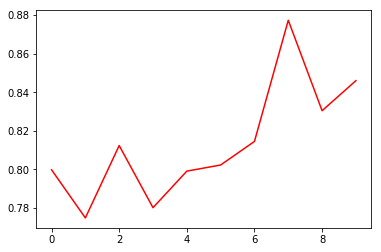

In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")

weather = pd.read_csv("weatherAUS.csv")

weather = weather.replace("NA", np.nan)
weather = weather.dropna()

weather['RainToday'] = pd.factorize(weather.RainToday)[0] + 1
weather['RainTomorrow'] = pd.factorize(weather.RainTomorrow)[0] + 1
weather['WindGustDir'] = pd.factorize(weather.WindGustDir)[0] + 1
weather['WindDir9am'] = pd.factorize(weather.WindDir9am)[0] + 1
weather['WindDir3pm'] = pd.factorize(weather.WindDir9am)[0] + 1
weather['Location'] = pd.factorize(weather.Location)[0] + 1

featureList = ["Location","MinTemp","MaxTemp","WindGustSpeed","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm"]

rf = RandomForestClassifier(n_estimators=5)

y = np.array(weather[['RainToday']])
x = np.array(weather[featureList])


k_fold = KFold(n_splits=10)
k_fold.get_n_splits(x)


results = []
for train_index, test_index in k_fold.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(x_train,y_train)
    results.append(rf.score(x_test,y_test))
print(epoch, results)

plt.subplot()
plt.plot(results,'r-')
plt.show()